In [19]:
import networkx as nx

def RegularLattice(n, k):
    G = nx.Graph()
    nodes = [i for i in range(1, n+1)]
    G.add_nodes_from(nodes)
    for i in range(0, n):
        for j in range(1, k+1):
            G.add_edge(nodes[i], nodes[i-j])
    
    nx.draw(G, with_labels = True)

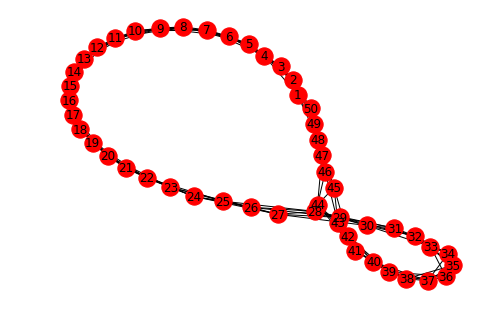

In [20]:
RegularLattice(50, 3)

In [21]:
import networkx as nx
MazeMatrix=[[1,0,1,1,0,1],
            [1,1,0,0,0,0],
            [0,1,0,1,1,1],
            [0,1,1,1,0,1], 
            [1,0,0,1,1,1],
            [1,1,0,0,0,1],
            [0,0,1,1,0,1]]

start=(0,0)
finish=(6,5)

In [22]:
#def MazeMatrix2Graph(MazeMatrix):
m = len(MazeMatrix)
n = len(MazeMatrix[0])
MazeGraph = nx.Graph()
for i in range(m):
    for j in range(n):
        if MazeMatrix[i][j] == 1:
            MazeGraph.add_node((i, j))
            if i-1>=0 and MazeMatrix[i-1][j]==1:
                MazeGraph.add_edge((i, j), (i-1, j))
            if j-1>=0 and MazeMatrix[i][j-1]==1:
                MazeGraph.add_edge((i, j), (i, j-1))

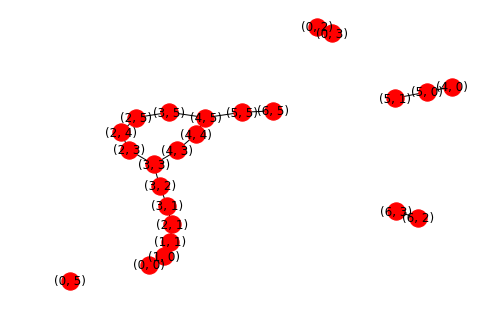

In [23]:
nx.draw(MazeGraph, with_labels = True)

In [24]:
#def MazeAnswerBFS(MazeGraph,start,finish):
queue = []
distance = [[99999999 for i in range(n)] for j in range(m)]
parent = [[(-1, -1) for i in range(n)] for j in range(m)]

queue.append(start)
(i, j) = start
distance[i][j] = 0
parent[i][j] = (i, j)

for node_1 in queue:
    (i1, j1) = node_1
    for node_2 in list(MazeGraph.adj[node_1]):
        (i2, j2) = node_2
        if (distance[i1][j1] + 1) < distance[i2][j2]:
            queue.append((i2, j2))
            distance[i2][j2] = distance[i1][j1] + 1
            parent[i2][j2] = node_1

shortest_path = []
(i, j) = finish
while(not parent[i][j]==(i, j)):
    shortest_path.append((i, j))
    (i, j) = parent[i][j]
shortest_path.append((i, j))
shortest_path = shortest_path[::-1]

In [25]:
shortest_path

[(0, 0),
 (1, 0),
 (1, 1),
 (2, 1),
 (3, 1),
 (3, 2),
 (3, 3),
 (4, 3),
 (4, 4),
 (4, 5),
 (5, 5),
 (6, 5)]

In [26]:
#def MazeComponentsDFS(MazeGraph):
stack = []
components = []
count = 0
Visited = [[0 for i in range(n)] for j in range(m)]

Visited[i][j] = 1

for i in range(m):
    for j in range(n):
        if Visited[i][j] == 0 and (i, j) in list(MazeGraph.nodes):
            count = count+1
            stack.append((i, j))
            Visited[i][j] = 1
            individual_component = []
            while(len(stack)!=0):
                node_1 = stack.pop()
                individual_component.append(node_1)
                for node_2 in list(MazeGraph.adj[node_1]):
                    (i2, j2) = node_2
                    if (Visited[i2][j2] == 0):
                        stack.append(node_2)
                        Visited[i2][j2] = 1
            components.append(individual_component)

In [27]:
components

[[(0, 2), (0, 3)],
 [(0, 5)],
 [(1, 0),
  (1, 1),
  (2, 1),
  (3, 1),
  (3, 2),
  (3, 3),
  (4, 3),
  (4, 4),
  (4, 5),
  (5, 5),
  (6, 5),
  (3, 5),
  (2, 5),
  (2, 4),
  (2, 3)],
 [(4, 0), (5, 0), (5, 1)],
 [(6, 2), (6, 3)]]